# Temperature Fluctuations in Walls

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To solve the heat conduction equation on plane parallel geometries (e.g. homogeneous walls with thickness $d$), we again assume harmonic temperature changes on the surfaces (left surface at $x = - d/2$, right surface at $x = d/2$). As an approach, we use the solution of the semi-infinite space on both sides. After a superposition of these, which must fulfil the boundary conditions, we obtain for the temperature within the wall

$$
  \vartheta(x, t) = \frac{\text{e}^{i \omega t}}{\text{sinh}(\hat{d})} (\Delta \vartheta_R\,  \text{sinh}(\hat{x} + \hat{d} / 2) -
                  \Delta \vartheta_L\,  \text{sinh}(\hat{x} - \hat{d} / 2))
$$

with $\hat{x} = \frac{x}{\sigma} (1 + i)$ and $\hat{d} = \frac{d}{\sigma} (1 + i)$. $\Delta \vartheta_R$ and $\Delta \vartheta_L$ are the temperature amplitudes at the corresponding surface, respectively. 

The following plot shows an example.

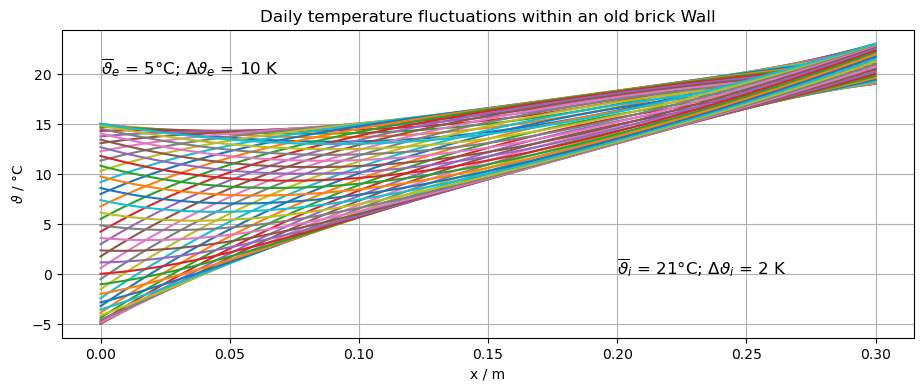

In [2]:
# --------------- bondary conditions -----------------------
Te   = 5
Ti   = 21
dT_e = 10  # outsise temperature amplitude 
dT_i = 2  # inside 

# -------------- material an system properties --------------
lam    = 0.5
rho_cp = 1000 * 1000

T      = 24 * 3600 # period
omega  = 2 * np.pi / T

a      = lam / rho_cp
sigma  = (T / np.pi * a)**0.5
d      = 0.3 # wall thickness
Nx     = 100
x      = np.linspace(-d/2, d/2, Nx) # x coordinate within the wall; x=0 represents exterior surface
x      = x 
Nt     = 100
t      = np.linspace(0, T, Nt)

# ----------------- dimensionless sizes
dd     = d / sigma * (1 + 1j)  
xd     = x / sigma * (1 + 1j)

theta = np.zeros((Nx, Nt)).astype(complex)
theta_stat = Te + (x + d/2) / d * (Ti - Te)     # stationary part
for nt in range(0, Nt):
    theta[:, nt] = np.exp(1j * omega * t[nt]) / np.sinh(dd) * (dT_i * np.sinh(xd[:] + dd/2) - dT_e * np.sinh(xd[:] - dd/2)) + theta_stat[:]
    
fig = plt.figure(figsize=(11, 4))
for nt in range(0, Nt, 2):
    plt.plot(x + d/2, np.real(theta[:, nt]))
plt.title('Daily temperature fluctuations within an old brick Wall')
text_e = r'$\overline{\vartheta}_e$ = ' + str(Te) + '°C; ' + r'$\Delta \vartheta_e$ = ' + str(dT_e) + ' K'
text_i = r'$\overline{\vartheta}_i$ = ' + str(Ti) + '°C; ' + r'$\Delta \vartheta_i$ = ' + str(dT_i) + ' K'
plt.text(0,  20, text_e, fontsize = 12) # figure coordinates are used!
plt.text(0.2, 0, text_i, fontsize = 12)
plt.xlabel('x / m')
plt.ylabel(r'$\vartheta$ / °C')
plt.grid()
plt.show()

```{admonition} Tasks
:class: full-width

- discuss the temperature profile.

- how large is the penetration depth?

- calculate the flux amplitudes at both boundaries for the above case.

- modify the material properties (start the rocket button...) and look what happens!
```

## 4-pole Matrix

Using Fourier's 1st law, the flux density $q(x,t)$ can be calculated from the above solution.

Since in the following we are only interested in the temperature $\Delta \vartheta$ and flux density amplitudes $\Delta q$ at the surfaces, the results can be formulated as a 2x2 matrix equation similar to a 4-pole with two inputs and two outputs.
datrix}
\]
$$

$$
    \begin{pmatrix} \Delta \vartheta_{out} \\ \Delta q_{out} \end{pmatrix} = 
    \begin{pmatrix} m_{11} & m_{12} \\ m_{21} & m_{22} \end{pmatrix}
    \begin{pmatrix} \Delta \vartheta_{in} \\ \Delta q_{in} \end{pmatrix}
$$

The elements of the matrix $M$ are $m_{11} = \cosh(\hat{d})$, $m_{22} = m_{11}$, $m_{12} = -\hat{H} \sinh(\hat{d})$, $m_{21} = -\frac{1}{\hat{H}} \sinh(\hat{d})$ 
and $\hat{H} = \frac{\lambda}{\sigma}(1 + \text{i})$.

The following results for the determinant:

$$\text{Det}(M) = 1$$

An example should show how to calculate with it. To do this, we look at a wall that is exposed to solar radiation. We are interested in the temperature amplitude $\Delta \vartheta$ caused by the radiation as a function of the contact resistance $r$ on the surface. As the system ends on the inside, we need to specify a suitable boundary condition. For buildings without internal insulation, we choose an isothermal termination, which can be justified by a large thermal capacity on the inside. The system then looks like this.

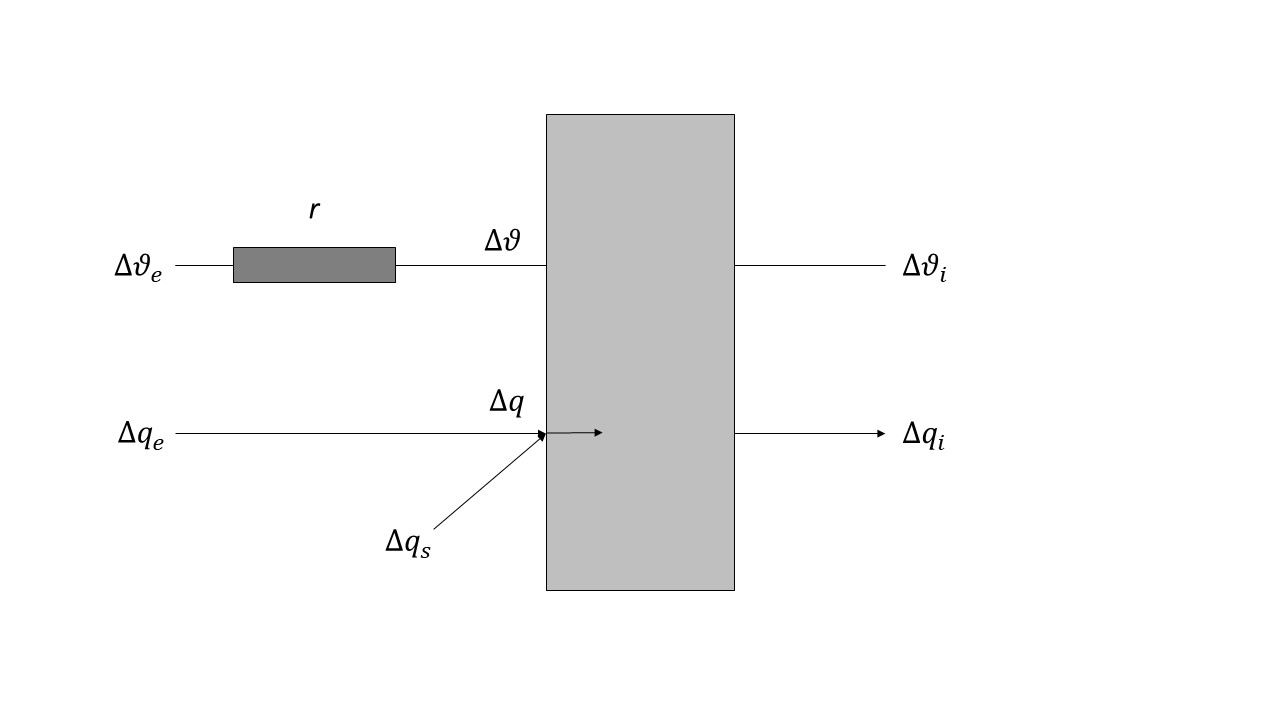

In [3]:
from IPython.display import Image
Image("4polr.jpg")

```{admonition} Tasks
:class: full-width

Show that the following equations are obtained for the temperature amplitude on the outside and for the heat flux density on the inside under the above boundary condition.

Discuss the results shown in the plot below.
```

$$
    \Delta \vartheta = m_{12}\, \frac{\Delta \vartheta_e\,  + \Delta q_s\, r}{m_{12} - m_{11}\, r}
$$
$$
    \Delta q_i = \frac{\Delta \vartheta_e + \Delta q_s\, r}{m_{11}\, r - m_{12}}
$$

## Results for $\Delta \vartheta$ and $\Delta q_i$

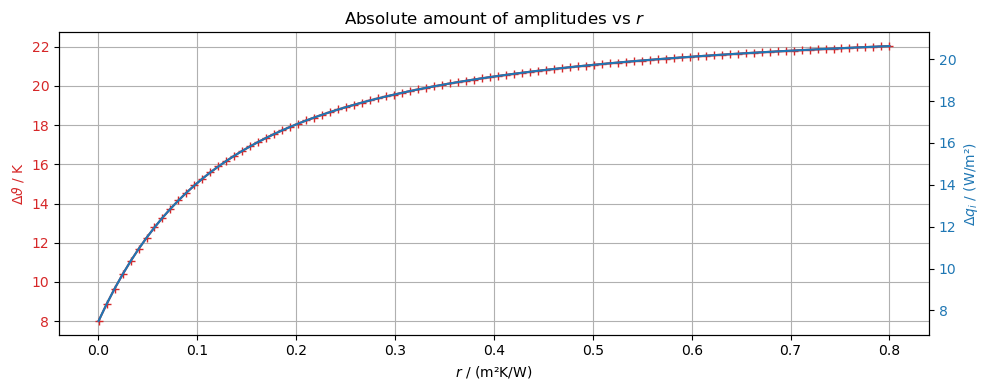

In [4]:
dTe   = 8
tau   = 0.8                # solar transmission
alpha = 0.6                # solar absorption
dqs   = 300 * tau * alpha  # absorbed solar radiation on the surface

lam   = 0.5
rhocp = 1000 * 1000
d     = 0.3                # wall thickness

T     = 24*3600            # period

sigma = (T/np.pi * lam/rhocp)**0.5
H     = lam/sigma * (1 + 1j)
dd    = d/sigma * (1 + 1j)
m11   = np.cosh(dd)
m22   = m11
m12   = - 1/H * np.sinh(dd)
m21   = -H * np.sinh(dd)

r     = np.linspace(1e-4, 0.8, 100) # resistance
dT    = m12 * (dTe + dqs*r)/(m12 - m11*r)
dqi   = (dTe + dqs*r)/(m11*r - m12)

fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.set_title('Absolute amount of amplitudes vs $r$')
color = 'tab:red'
ax1.set_xlabel('$r$ / (m²K/W)')
ax1.set_ylabel(r'$\Delta \vartheta$ / K', color=color)
ax1.plot(r, np.abs(dT), color=color, marker='+')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(r'$\Delta q_i$ / (W/m²)', color=color)  # we already handled the x-label with ax1
ax2.plot(r, np.abs(dqi), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()